# Method 1: Image Classification using CNN model (Custom)

### Step 1: P R E P R O C E S S I N G 

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
# ====================================================================== 
# P R E P R O C E S S I N G: DATA AUGMENTATION only for training data not for test data
# ====================================================================== 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Training data preprocessing
## Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)



## Loading my Data from the folder and appying the data augmentation to the dataset
training_set = train_datagen.flow_from_directory('/Users/arjunsingh/SUPER DATA SCIENCE tutorial/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set', 
                                                 target_size=(256,256), 
                                                 batch_size=32, 
                                                 class_mode='binary')
#Found 8000 images belonging to 2 classes.

# ====================================================================== 
# Test data preprocessing
## No data Augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

## Connecting to Dataset folder and 
test_set = test_datagen.flow_from_directory('/Users/arjunsingh/SUPER DATA SCIENCE tutorial/Section 40 - Convolutional Neural Networks (CNN)/dataset/test_set', 
                                                 target_size=(256,256), 
                                                 batch_size=32, 
                                                 class_mode='binary')
#Found 2000 images belonging to 2 classes.

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


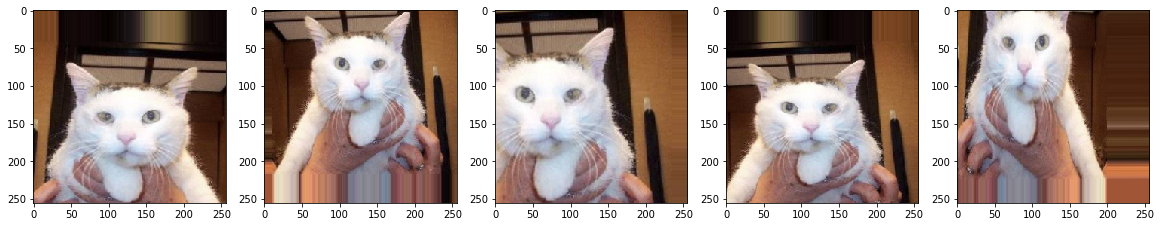

In [4]:
# ====================================================================== 
# Visualizing the Augmented Images
# ====================================================================== 
import matplotlib.pyplot as plt
augmented_images = [training_set[0][0][0] for i in range(5)]
augmented_images
plt.figure(figsize=(20,20))
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(augmented_images[i])
plt.show()


### Step 2: BUILDING CNN, defining the model architecture(layers)


In [5]:
# ====================================================================== 
# BUILDING CONVOLUTION NEURAL NETWORK
# ====================================================================== 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2, l1, l1_l2

model_cnn = Sequential()

# Layer1:  Convolution + Max Pooling + Batch Normalization + dropout
model_cnn.add(Conv2D(filters=32 , kernel_size=(3,3)  , activation= 'relu' , input_shape = [256,256,3], kernel_regularizer=l2(0.001)))
model_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

# Layer2:  Convolution + Max Pooling + Batch Normalization + dropout
model_cnn.add(Conv2D(filters=64 , kernel_size=(3,3)  , activation= 'relu' ,kernel_regularizer=l2(0.001)))
model_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

# Layer3:  Convolution + Max Pooling + Batch Normalization + dropout
model_cnn.add(Conv2D(filters=128 , kernel_size=(3,3)  , activation= 'relu' ,kernel_regularizer=l2(0.001) ))
model_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

# Flatten the output to 1-D
model_cnn.add(Flatten())

# Layer4: Running a simple NN with 3 layers
# NN1
model_cnn.add(Dense(units = 512, activation = 'relu' ,kernel_regularizer=l2(0.001)))
model_cnn.add(Dropout(0.2))

# NN2
model_cnn.add(Dense(units = 256, activation = 'relu' ,kernel_regularizer=l2(0.001)))
model_cnn.add(Dropout(0.2))

# NN3
model_cnn.add(Dense(units = 128, activation = 'relu' ,kernel_regularizer=l2(0.001)))
model_cnn.add(Dropout(0.2))

#output
model_cnn.add(Dense(units = 1, activation = 'sigmoid'))

# ====================================================================== 
# COMPILING CONVOLUTION NEURAL NETWORK
# ====================================================================== 
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005) #Learning rate is half of the default
model_cnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        2

In [8]:
# ====================================================================== 
# FITTING CONVOLUTION NEURAL NETWORK
# ====================================================================== 
history_simple = model_cnn.fit(x = training_set, epochs= 50 , validation_data=test_set)

Epoch 1/50
250/250 [==============================] - 479s 2s/step - loss: 4.4540 - accuracy: 0.5345 - val_loss: 3.7228 - val_accuracy: 0.5080
Epoch 2/50
250/250 [==============================] - 481s 2s/step - loss: 3.4579 - accuracy: 0.5648 - val_loss: 3.1232 - val_accuracy: 0.5935
Epoch 3/50
250/250 [==============================] - 515s 2s/step - loss: 2.8561 - accuracy: 0.5878 - val_loss: 2.5307 - val_accuracy: 0.6510
Epoch 4/50
250/250 [==============================] - 472s 2s/step - loss: 2.3106 - accuracy: 0.6158 - val_loss: 2.0816 - val_accuracy: 0.6515
Epoch 5/50
250/250 [==============================] - 476s 2s/step - loss: 1.8854 - accuracy: 0.6461 - val_loss: 1.7044 - val_accuracy: 0.6610
Epoch 6/50
250/250 [==============================] - 465s 2s/step - loss: 1.6110 - accuracy: 0.6654 - val_loss: 1.5080 - val_accuracy: 0.6505
Epoch 7/50
250/250 [==============================] - 464s 2s/step - loss: 1.4534 - accuracy: 0.6799 - val_loss: 1.3422 - val_accuracy: 0.7305

In [9]:
_,acc = model_cnn.evaluate(test_set,steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

> 88.250



### Step 3a:  Visualizing Accuracy 


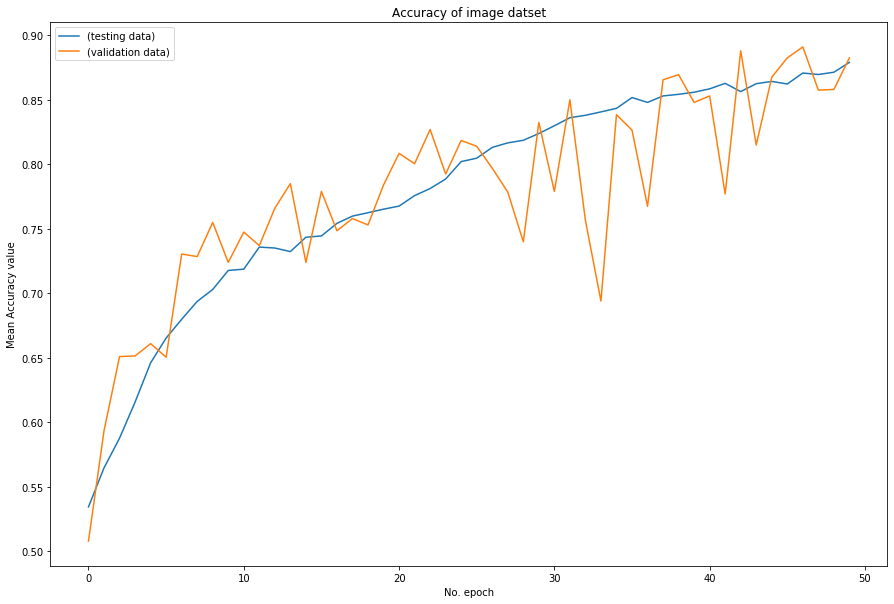

In [10]:
history_simple.history.keys()
# Plot history: Accuracy
f, ax = plt.subplots(figsize=(15,10))
plt.plot(history_simple.history['accuracy'], label='(testing data)')
plt.plot(history_simple.history['val_accuracy'], label='(validation data)')
plt.title('Accuracy of image datset')
plt.ylabel('Mean Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


### Step 3b: Visualizing loss


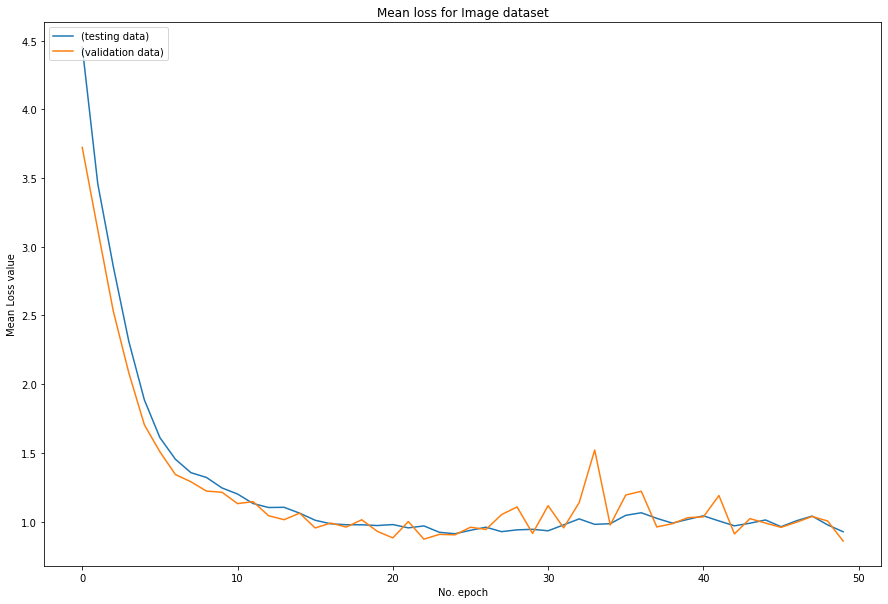

In [11]:
# Plot history: Loss
f, ax = plt.subplots(figsize=(15,10))
plt.plot(history_simple.history['loss'], label='(testing data)')
plt.plot(history_simple.history['val_loss'], label='(validation data)')
plt.title('Mean loss for Image dataset')
plt.ylabel('Mean Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

### Step 4: Single Instance prediction

In [26]:
### ===================================================
## Testing for Single Instance 
### ===================================================
from tensorflow.keras.preprocessing import image
import numpy as np
test_image = image.load_img('/Users/arjunsingh/SUPER DATA SCIENCE tutorial/Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model_cnn.predict(test_image)

# ENCODING the numerical value into category
training_set.class_indices  # to get right indices/classes
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


### Step 5: Saving model

In [13]:
### ===================================================
# Saving my model and weights
### ===================================================
model_cnn.save('/Users/arjunsingh/Python Work/CNN Models/dogs_and_cats_classifier.h5')  #saves both model and architecture

# Method 2: Transfer Learning
### Step 2: BUILDING CNN using VGG architecture

In [14]:
### ===================================================
# vgg16 model used for transfer learning on the dogs and cats dataset
### ===================================================
import sys
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(256,256, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [15]:
### ===================================================
# define model
### ===================================================
model_vgg = define_model()
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [16]:
### ===================================================
# fit model
### ===================================================
history_vgg = model_vgg.fit(x = training_set, epochs= 50 , validation_data=test_set)

Epoch 1/50
250/250 [==============================] - 1660s 7s/step - loss: 0.4496 - accuracy: 0.7818 - val_loss: 0.2905 - val_accuracy: 0.8730
Epoch 2/50
250/250 [==============================] - 1415s 6s/step - loss: 0.3265 - accuracy: 0.8499 - val_loss: 0.4549 - val_accuracy: 0.7855
Epoch 3/50
250/250 [==============================] - 1526s 6s/step - loss: 0.2995 - accuracy: 0.8683 - val_loss: 0.2096 - val_accuracy: 0.9125
Epoch 4/50
250/250 [==============================] - 1898s 8s/step - loss: 0.2830 - accuracy: 0.8788 - val_loss: 0.2786 - val_accuracy: 0.8800
Epoch 5/50
250/250 [==============================] - 1551s 6s/step - loss: 0.2637 - accuracy: 0.8869 - val_loss: 0.2444 - val_accuracy: 0.8985
Epoch 6/50
250/250 [==============================] - 1279s 5s/step - loss: 0.2647 - accuracy: 0.8815 - val_loss: 0.1876 - val_accuracy: 0.9205
Epoch 7/50
250/250 [==============================] - 1203s 5s/step - loss: 0.2546 - accuracy: 0.8878 - val_loss: 0.1741 - val_accuracy:

In [17]:
### ===================================================
# evaluate model
### ===================================================
_,acc = model_vgg.evaluate(test_set,steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

> 93.750


### Step 3: Visualizing the accuracy and loss for the VGG model 

In [31]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #plt.savefig(filename + '_plot.png')
    plt.close()

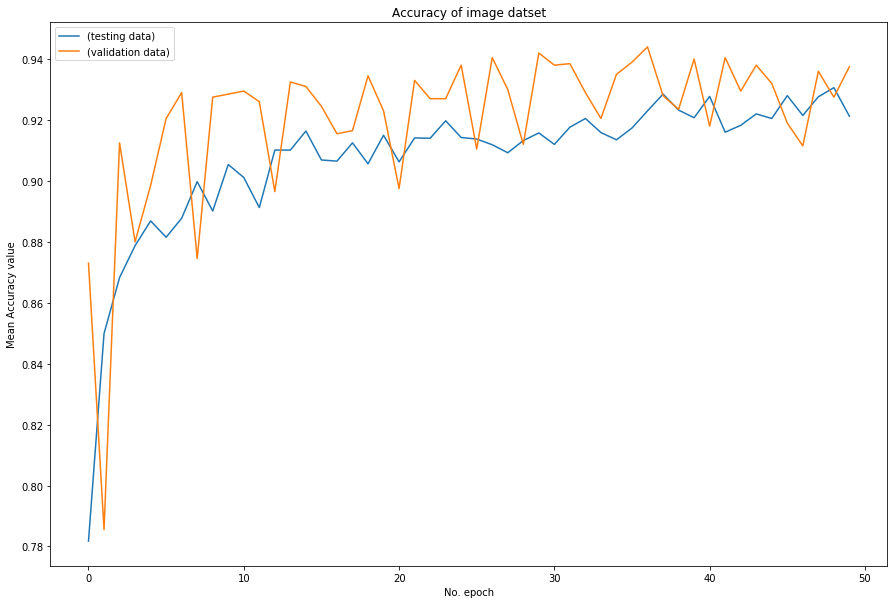

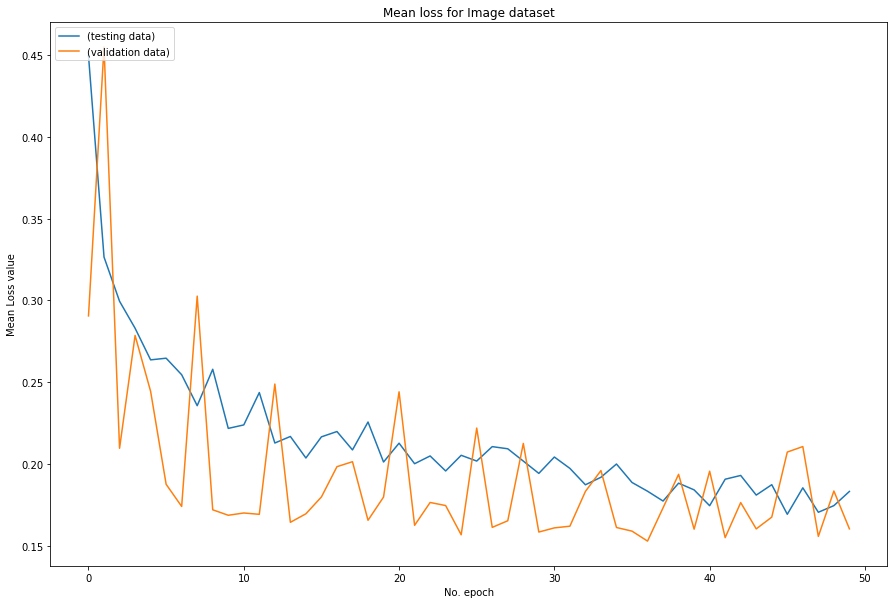

In [32]:
history_vgg.history.keys()
# Plot history: Accuracy
f, ax = plt.subplots(figsize=(15,10))
plt.plot(history_vgg.history['accuracy'], label='(testing data)')
plt.plot(history_vgg.history['val_accuracy'], label='(validation data)')
plt.title('Accuracy of image datset')
plt.ylabel('Mean Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")


# Plot history: Loss
f, ax = plt.subplots(figsize=(15,10))
plt.plot(history_vgg.history['loss'], label='(testing data)')
plt.plot(history_vgg.history['val_loss'], label='(validation data)')
plt.title('Mean loss for Image dataset')
plt.ylabel('Mean Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [35]:
### ===================================================
# Visualizing the accuracy and loss for the model
### ===================================================
summarize_diagnostics(history_vgg)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

In [27]:
### ===================================================
## Testing for Single Instance 
### ===================================================
result2 = model_vgg.predict(test_image)

# ENCODING the numerical value into category
training_set.class_indices  # to get right indices/classes
if result2[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [28]:
### ===================================================
# Saving my model and weights
### ===================================================
model_vgg.save('/Users/arjunsingh/Python Work/CNN Models/dogs_and_cats_VGGclassifier.h5')  #saves both model and architecture